In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [11]:
# 1. Load Dataset
# -------------------------------
df = pd.read_csv("/content/archive (2).zip")
print("Dataset Loaded Successfully")
print(df.head())


Dataset Loaded Successfully
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
# 2. Check Missing Values
# -------------------------------
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [13]:
# 3. Select Features for Clustering
# Using: Age, Annual Income, Spending Score
# -------------------------------
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [14]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# 4. Elbow Method – choose number of clusters K
# -------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

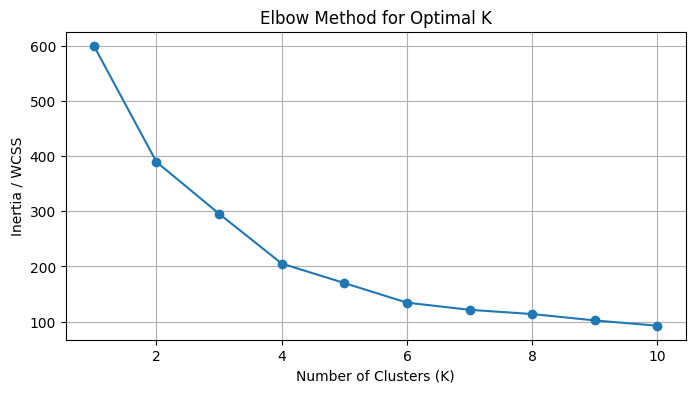

In [17]:
# Plot Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia / WCSS")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()


In [18]:
# 5. Apply KMeans with chosen K=5
# -------------------------------
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

print("\nClustered Data:")
print(df.head())


Clustered Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


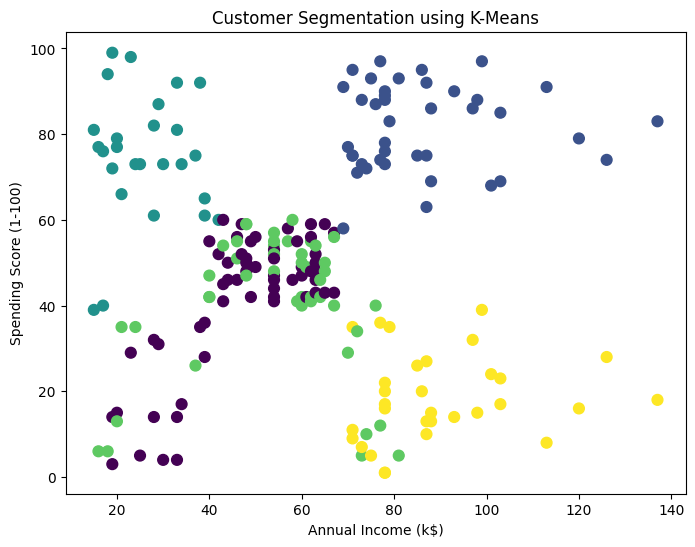

In [19]:
# 6. Visualize Clusters
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"], s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.show()


In [20]:
# 7. Summary Interpretation
# -------------------------------
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871
